<a href="https://colab.research.google.com/github/uttoxi/Feynn-labs-project/blob/main/Utkarsh_mcdonalds_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**<h1> Mcdonalds Case Study<h1>**




### Step-3 = Collecting Dataset

In [16]:
import pandas as pd
import numpy as np

mcd_data = pd.read_csv('/content/drive/MyDrive/Feynn/mcdonalds_case_study.csv')

### **Step-4= Exploring Dataset**

In [17]:
mcd_data.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [18]:
mcd_data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [19]:

for column in mcd_data.columns:
    distinct_values = mcd_data[column].unique()
    print(f"Column '{column}' has {len(distinct_values)} distinct values:")
    print(distinct_values)
    print()

Column 'yummy' has 2 distinct values:
['No' 'Yes']

Column 'convenient' has 2 distinct values:
['Yes' 'No']

Column 'spicy' has 2 distinct values:
['No' 'Yes']

Column 'fattening' has 2 distinct values:
['Yes' 'No']

Column 'greasy' has 2 distinct values:
['No' 'Yes']

Column 'fast' has 2 distinct values:
['Yes' 'No']

Column 'cheap' has 2 distinct values:
['Yes' 'No']

Column 'tasty' has 2 distinct values:
['No' 'Yes']

Column 'expensive' has 2 distinct values:
['Yes' 'No']

Column 'healthy' has 2 distinct values:
['No' 'Yes']

Column 'disgusting' has 2 distinct values:
['No' 'Yes']

Column 'Like' has 11 distinct values:
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']

Column 'Age' has 54 distinct values:
[61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]

Column 'VisitFrequency' has 6 distinct values:
['Every three months' 'Once a week' 'Once 

In [20]:
mcd_data.shape

(1453, 15)

In [21]:
mcd_data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [22]:

# Extract columns 1 to 11 and convert to a binary matrix
MD_x = mcd_data.iloc[:, 0:11].eq('Yes').astype(int)

# Calculate the column means and round to two decimal places
result = np.round(MD_x.mean(), 2)

result

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

**Exploratory Data Analysis**

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print the summary
print("Standard deviation of each principal component:")
print(np.sqrt(pca.explained_variance_))
print("\nProportion of variance explained by each principal component:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained:")
print(np.cumsum(pca.explained_variance_ratio_))


Standard deviation of each principal component:
[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]

Proportion of variance explained by each principal component:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variance explained:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [24]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

row= ['stddev','prop_var','cum_var']
Compon = [np.sqrt(pca.explained_variance_),pca.explained_variance_ratio_,np.cumsum(pca.explained_variance_ratio_)]


principal_components_df = pd.DataFrame(data=Compon, columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])], index=row)


print(principal_components_df)

               PC1       PC2       PC3       PC4       PC5       PC6  \
stddev    0.757050  0.607456  0.504619  0.398799  0.337405  0.310275   
prop_var  0.299447  0.192797  0.133045  0.083096  0.059481  0.050300   
cum_var   0.299447  0.492244  0.625290  0.708386  0.767866  0.818166   

               PC7       PC8       PC9      PC10      PC11  
stddev    0.289697  0.275122  0.265251  0.248842  0.236903  
prop_var  0.043849  0.039548  0.036761  0.032353  0.029323  
cum_var   0.862015  0.901563  0.938323  0.970677  1.000000  


In [25]:

factor_loadings = pca.components_

# Create a DataFrame to store the factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings, columns=principal_components_df.columns, index =MD_x.columns)
factor_loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
convenient,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
spicy,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
fattening,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
greasy,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
fast,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
cheap,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
tasty,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
expensive,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
healthy,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


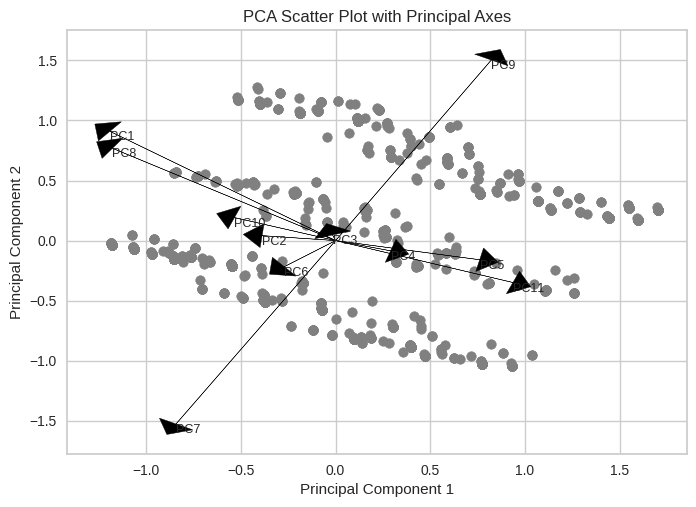

In [26]:
import matplotlib.pyplot as plt

pca_df = pd.DataFrame(data=MD_pca, columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])])

# Create a scatter plot of the data points projected onto the principal components
plt.scatter(pca_df["PC1"], pca_df["PC2"], c="grey")

# Get the principal axes (components) of the PCA model
principal_axes = pca.components_

# Plot the principal axes as lines
for i, (x, y) in enumerate(zip(principal_axes[0], principal_axes[1]), start=1):
    plt.arrow(0, 0, x*2.5, y*2.5, head_width=0.2, head_length=0.1, fc='black', ec='black')
    plt.text(x*2.5, y*2.5, f"PC{i}", ha="left", va="top", fontsize=9)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot with Principal Axes")
plt.grid(True)
plt.show()

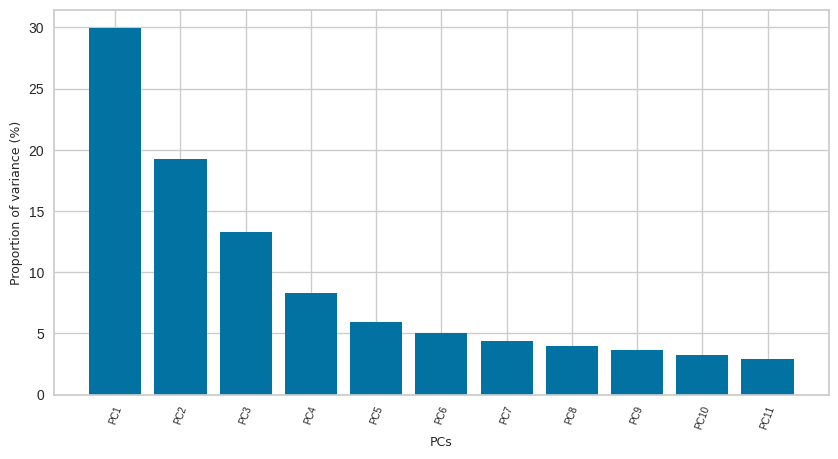

In [27]:
!pip install bioinfokit
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[factor_loadings_df.columns, pca.explained_variance_ratio_],show=True,dim=(10,5))

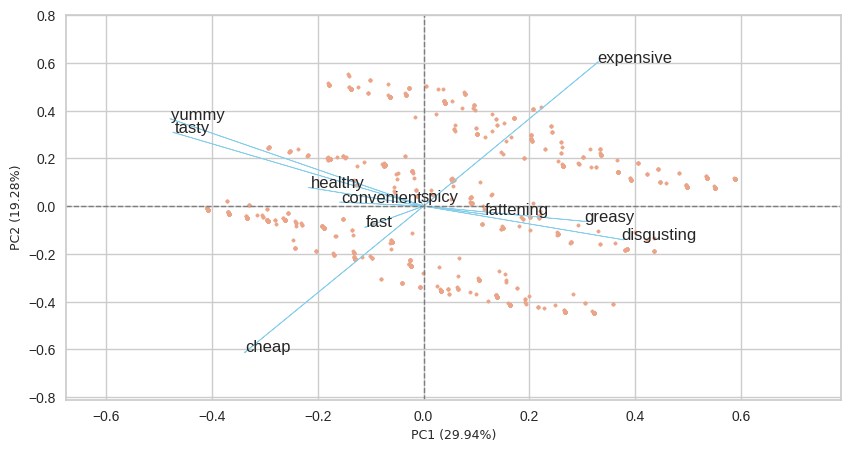

In [28]:
pca_scores = PCA().fit_transform(MD_x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=principal_axes, labels=MD_x.columns, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

## Step-5 = Extracting Segments

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

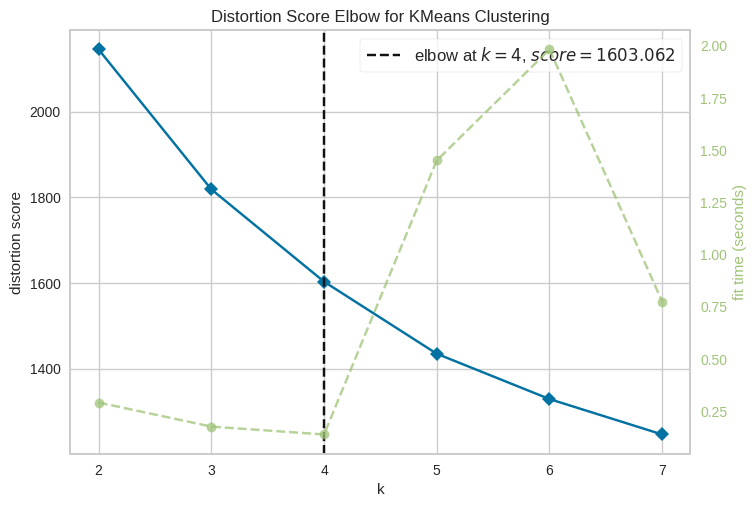

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8))

visualizer.fit(MD_x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [31]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans_model.fit_predict(MD_x)
mcd_data['cluster_num'] = kmeans_model.labels_ #adding to df
mcd_data





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,2
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male,3
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female,1
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female,0
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male,1


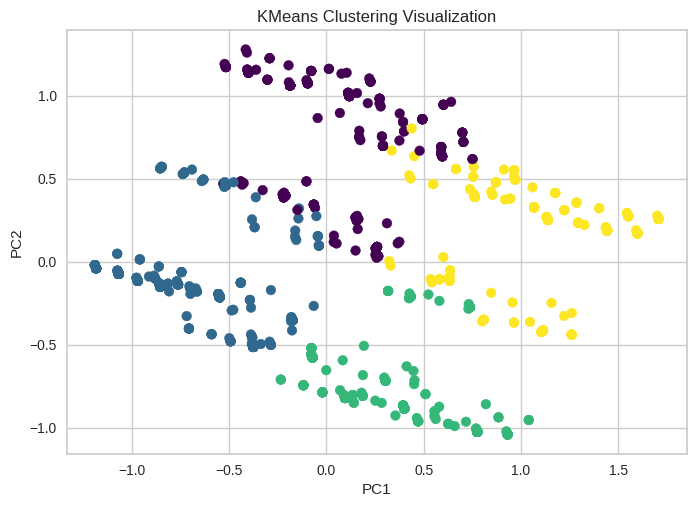

In [33]:
from sklearn import preprocessing

pca_data = preprocessing.scale(MD_x)

pca = PCA(n_components=11)
pc = pca.fit_transform(MD_x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf['cluster_num'] = kmeans_model.labels_



plt.scatter(pf['pc1'], pf['pc2'], c=kmeans_model.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering Visualization')
plt.legend()
plt.show()

In [34]:

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

# Assuming vacmot is a numpy array or pandas DataFrame
mcd_vdist = pdist(pf.T)
mcd_vclust = linkage(mcd_vdist, method='ward')

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram
distance_matrix = np.array(MD_x)
distance_matrix =distance_matrix .T
Z = linkage(distance_matrix, method='ward')  # 'ward' linkage uses Ward's minimum variance method

Z.shape

(10, 4)

In [38]:
MD_x_T=MD_x.T
MD_x_T.index.shape

(11,)

In [40]:
MD_x_T

,0,1,2,3,4,5,6,7,8,9,...,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452
yummy,0,1,0,1,0,1,1,1,0,1,...,1,0,0,1,0,0,1,1,1,0
convenient,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
spicy,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fattening,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
greasy,0,1,1,1,1,0,0,1,1,1,...,0,1,1,1,1,1,0,0,0,1
fast,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,0,0,0,1,1,0
cheap,1,1,0,1,1,1,0,1,0,0,...,1,1,1,1,0,0,1,0,1,0
tasty,0,1,1,1,0,1,1,1,0,1,...,1,0,1,1,1,0,1,1,1,0
expensive,1,1,1,0,0,0,1,0,1,1,...,0,0,0,0,1,1,0,1,0,1
healthy,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0


### **Step-6 : Profiling Segments**

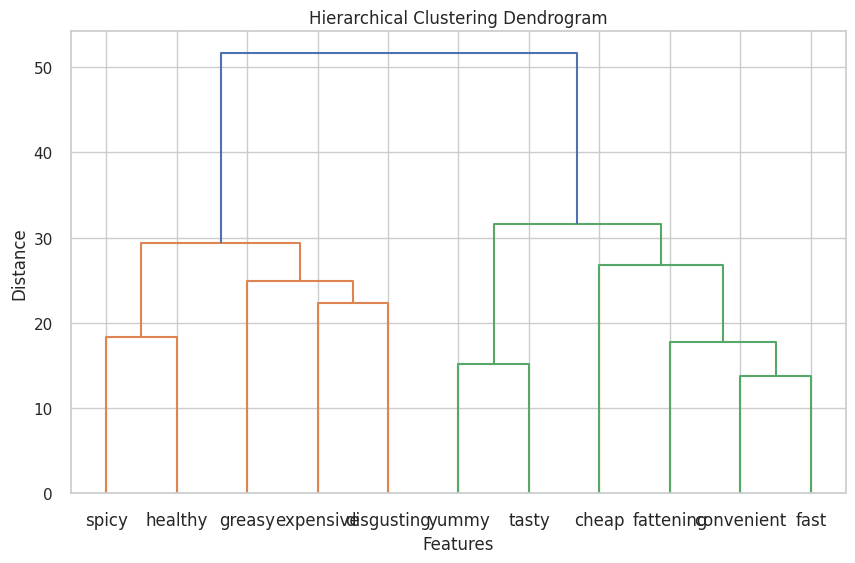

In [87]:
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=MD_x_T.index, orientation='top')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [42]:
MD_x['cluster_num']= kmeans_model.labels_


cluster_1_df = MD_x[MD_x["cluster_num"]==0]
cluster_1_df.head()







,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster_num
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
6,1,1,1,1,0,1,0,1,1,1,0,0
9,1,1,0,1,1,1,0,1,1,0,0,0
11,1,1,0,1,1,1,0,1,1,0,1,0


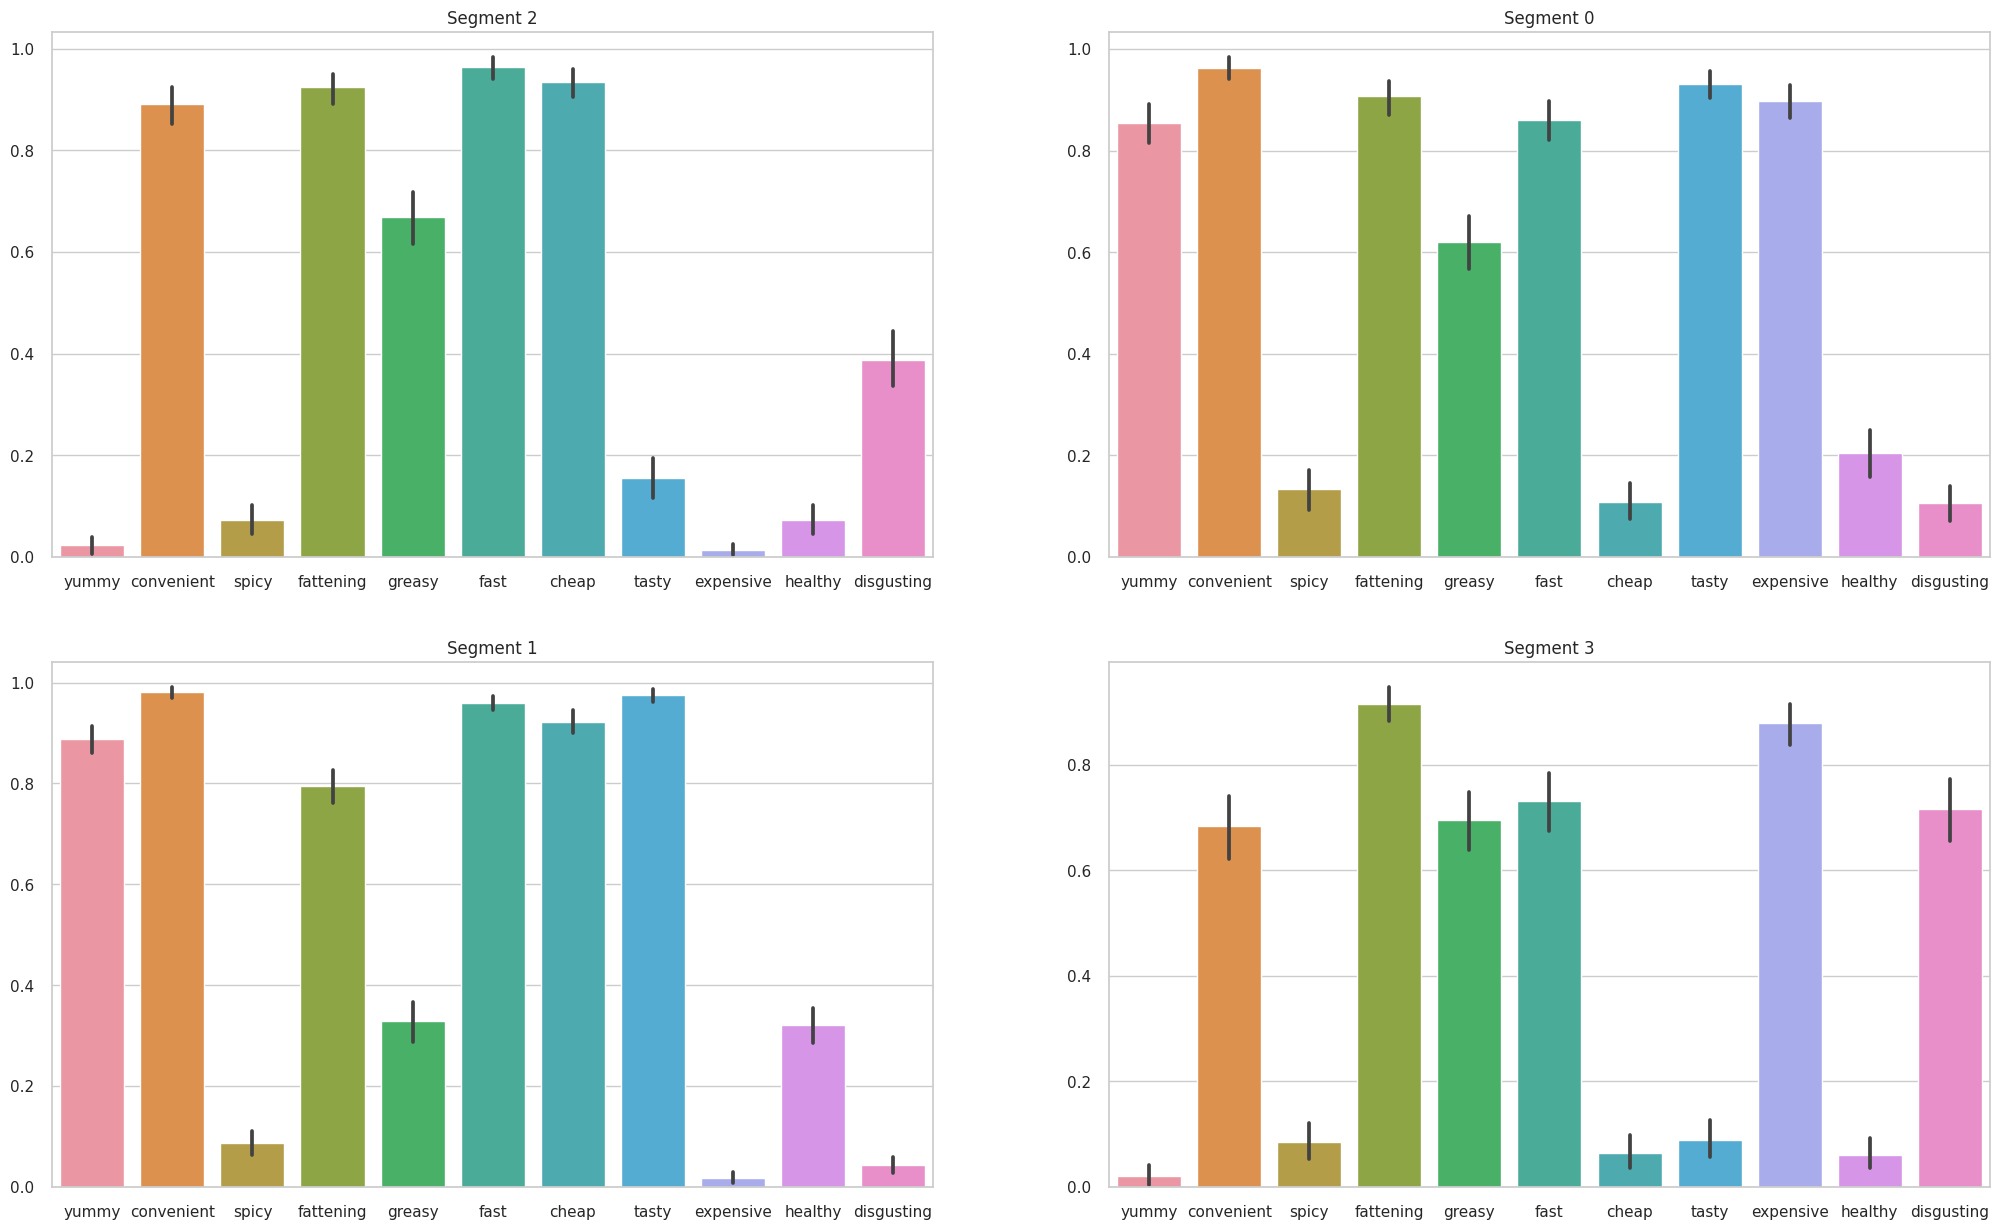

In [44]:
sns.set(style="whitegrid")

# Create a 1x2 panel plot for two segments
nrows, ncols = 2, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 15))

# Flatten axes to loop through them easily
axes_flat = axes.flatten()

# List of unique segment values
segments = MD_x['cluster_num'].unique()

# Create a bar plot for each segment
for segment, ax in zip(segments, axes_flat):
    segment_data = MD_x[MD_x['cluster_num'] == segment]
    sns.barplot(data=segment_data.iloc[:,:-1], ax=ax)
    ax.set_title(f'Segment {segment}')

# Adjust layout and show the plot

plt.show()


In [49]:
mcd_data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

### **Step-7 : Describing Segments**

In [51]:
mcd_data['Like']= mcd_data["Like"].replace({'I hate it!-5':'-5','I love it!+5':'+5'})


In [52]:
mcd_data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [53]:
mcd_data['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

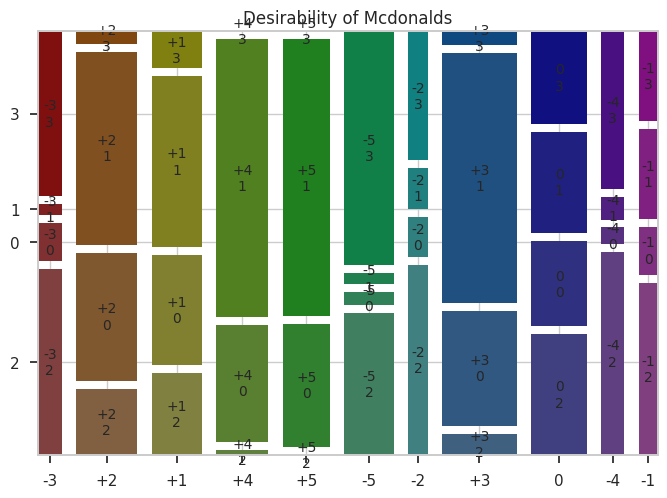

In [65]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(mcd_data, ['Like', 'cluster_num'], gap=0.03, title='Desirability of Mcdonalds')

plt.show()


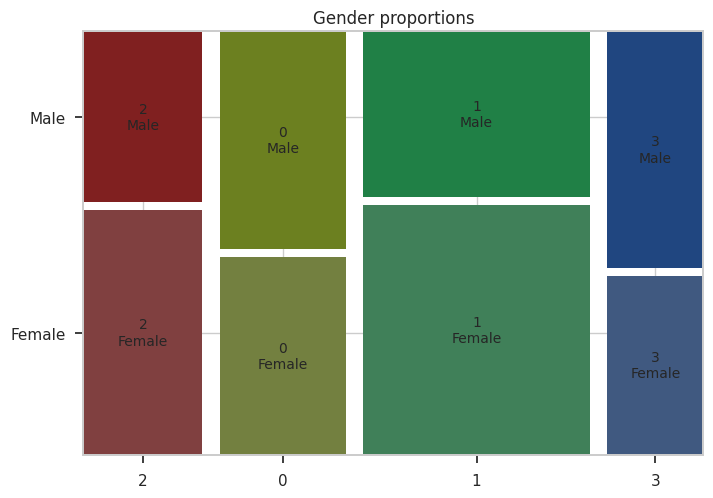

In [62]:
mosaic(mcd_data, [ 'cluster_num','Gender'], gap=0.03, title='Gender proportions')

plt.show()

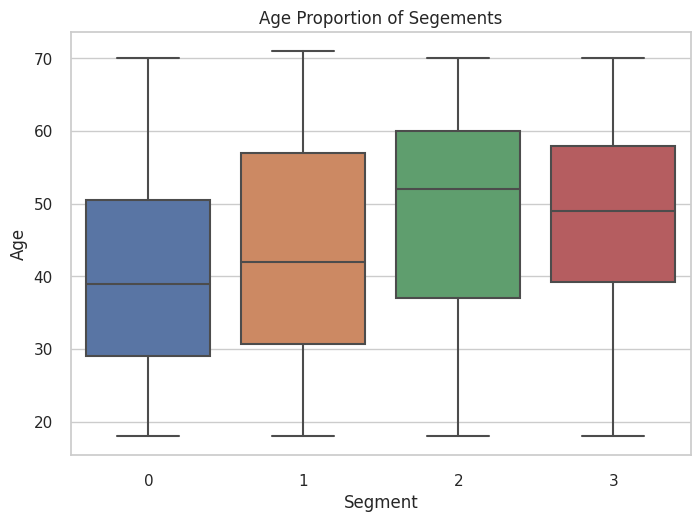

In [63]:
sns.boxplot(x='cluster_num', y='Age', data=mcd_data)

# Set labels and title
plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('Age Proportion of Segements')

# Show the plot
plt.show()

### **Step-8 : Selecting a Segment**

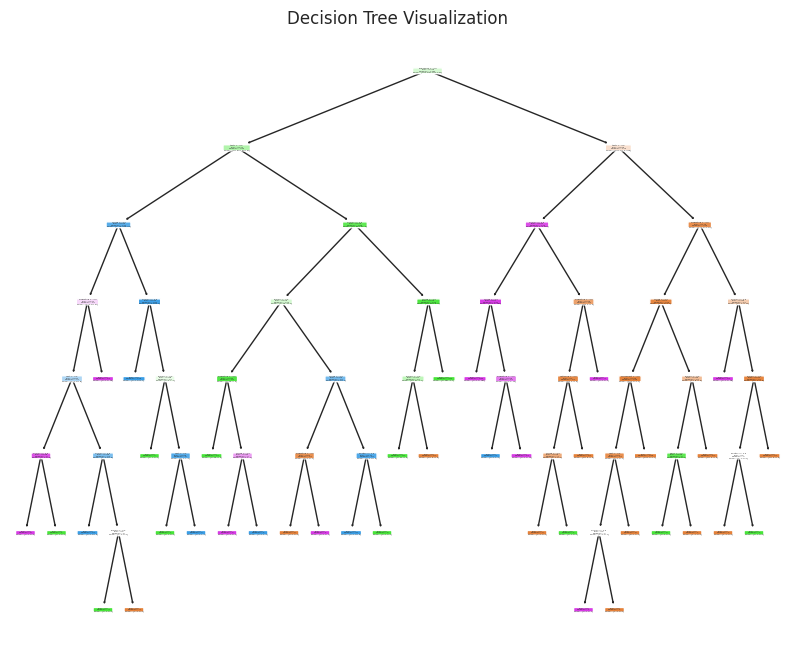

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

X = MD_x.iloc[:,:-1]
y = MD_x['cluster_num']

# Split the data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the decision tree model
clsf = tree.DecisionTreeClassifier(random_state=1234)

# Fit the model on the data
model = clsf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clsf, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [91]:
!pip install graphviz

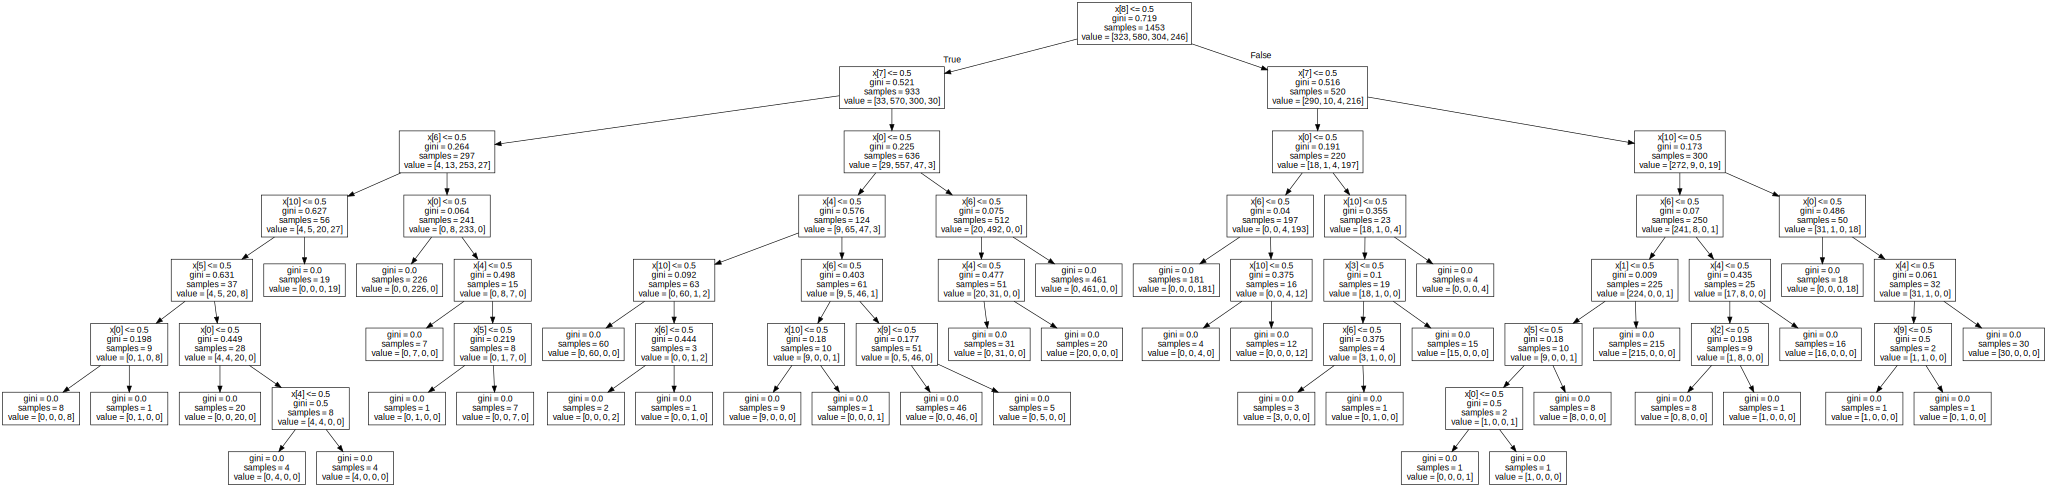

In [92]:
import graphviz
dot_data = tree.export_graphviz(clsf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [94]:
from sklearn.metrics import classification_report
from sklearn import metrics


# Create the decision tree model
clsf = DecisionTreeClassifier()

# Fit the model on the data
Decision_model = clsf.fit(X, y)
y_pred = Decision_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[131   0   0   0]
 [  0 231   0   0]
 [  0   0 118   0]
 [  0   0   0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       118
           3       1.00      1.00      1.00       102

    accuracy                           1.00       582
   macro avg       1.00      1.00      1.00       582
weighted avg       1.00      1.00      1.00       582



In [95]:
import pickle
filename = 'Mcdonalds_case_study_cluster'
pickle.dump(Decision_model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')


1.0 % Acuuracy
